In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
X,y = make_classification(n_samples=5,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=0)
dt = DecisionTreeClassifier()

In [2]:
dt.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'X[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

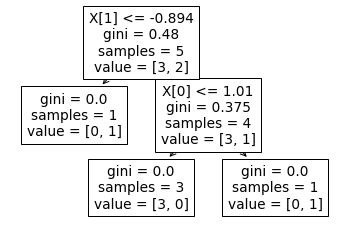

In [3]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [4]:
dt.feature_importances_

array([0.625, 0.375])

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)

RandomForestClassifier(n_estimators=2)

[Text(0.5, 0.75, 'X[1] <= 0.389\ngini = 0.32\nsamples = 3\nvalue = [4, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

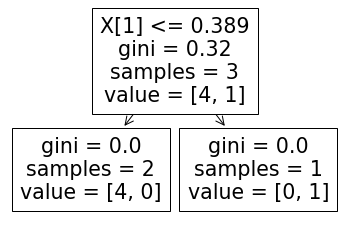

In [6]:
plot_tree(rf.estimators_[0])

[Text(0.5, 0.75, 'X[1] <= 0.389\ngini = 0.48\nsamples = 2\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 3]')]

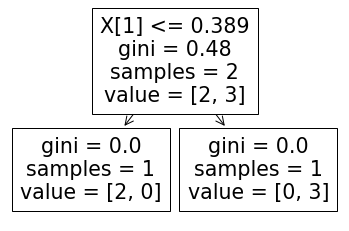

In [7]:
plot_tree(rf.estimators_[1])

In [8]:
rf.estimators_[0].feature_importances_

array([0., 1.])

In [9]:
rf.estimators_[1].feature_importances_

array([0., 1.])

In [10]:
#for random forest n_estimators=2
print(f'X[0]_feature_importance {(0+.44444444)/2}')
print('X[1]_feature_importance {}'.format((1+0.55555556)/2))

X[0]_feature_importance 0.22222222
X[1]_feature_importance 0.77777778


In [11]:
rf.feature_importances_

array([0., 1.])

[Text(0.3333333333333333, 0.875, 'X[1] <= -0.383\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5, 0.625, 'X[0] <= 0.878\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.444\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

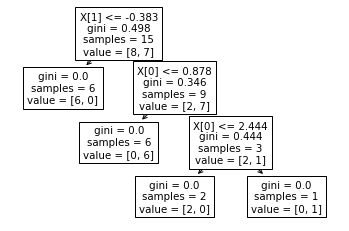

In [12]:
X,y = make_classification(n_samples=15,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X,y)
plot_tree(dt)

In [13]:
dt.feature_importances_

array([0.41666667, 0.58333333])

## Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below.

In [14]:
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [16]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


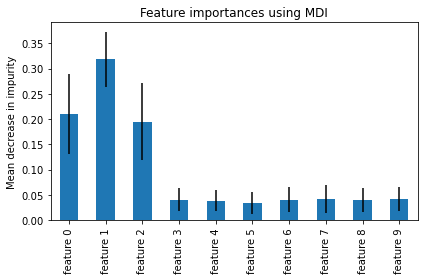

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [18]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1.410 seconds


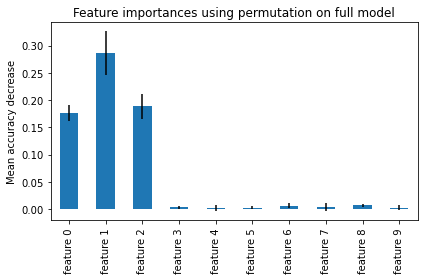

In [19]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
